In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
%load_ext autoreload
%autoreload 2
from cmblib import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
cmb = CMBspectra(lmax=3000)

In [4]:
N = 2**10  
pix_size  = .5
c_min = -400 
c_max = 400  
X_width = N*pix_size/60. 
Y_width = N*pix_size/60.

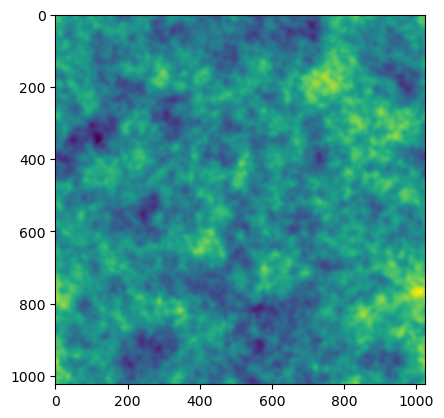

In [5]:
unlensed_t = cl2map(N,pix_size,cmb.ell,cmb.unlensed_spectra[:,0])
plt.imshow(unlensed_t)

In [6]:
l, cl_tt = map2cl(unlensed_t,50,3000,pix_size,N)

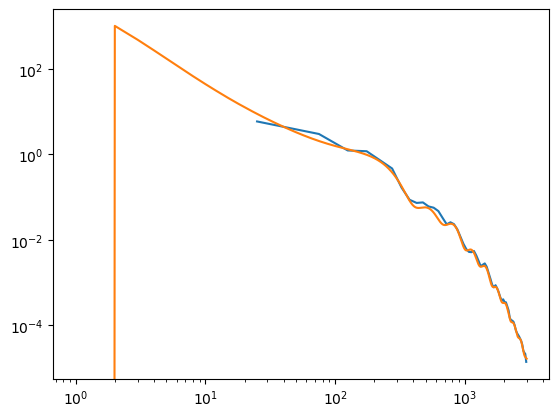

In [7]:
plt.loglog(l,cl_tt)
plt.loglog(cmb.ell,cmb.unlensed_spectra[:,0])

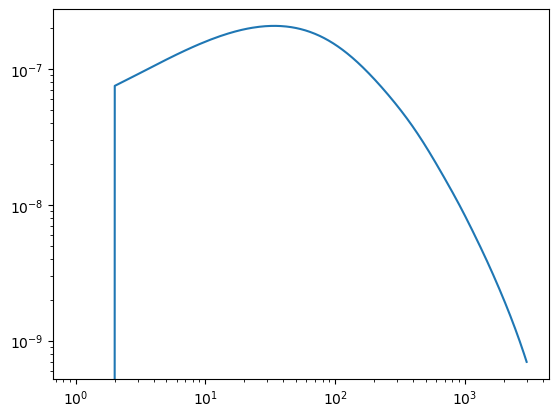

In [8]:
plt.loglog(cmb.ell,cmb.lensing_spectra[:,0]*cmb.dl_KK)

In [9]:
cl_KK = cmb.lensing_spectra[:,0]*cmb.dl_KK 

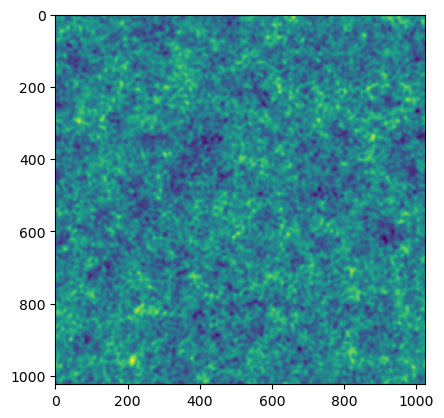

In [10]:
kappa = cl2map(N,pix_size,cmb.ell,cl_KK)
plt.imshow(kappa)

Text(0.5, 1.0, 'difference')

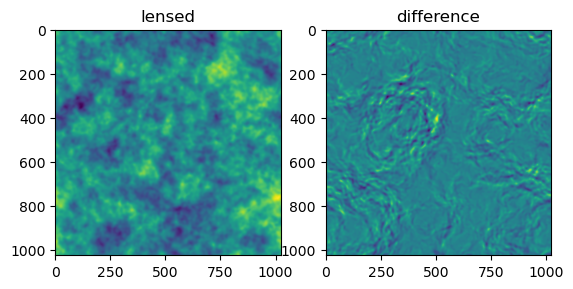

In [11]:

ly,lx,modlmap = get_ells(N,pix_size)

lensed = lens_map(unlensed_t,kappa,modlmap,ly,lx,N,pix_size)

plt.subplot(1,2,1)
plt.imshow(lensed)
plt.title('lensed')
plt.subplot(1,2,2)
plt.imshow(lensed-unlensed_t)
plt.title('difference')

In [12]:
ell = cmb.ell

/home/anto/Workspace/cmbml/cmblib.py:215: RuntimeWarning: divide by zero encountered in power
  return Clnoise*(1+(np.arange(lmax+1)/lknee)**-5.)


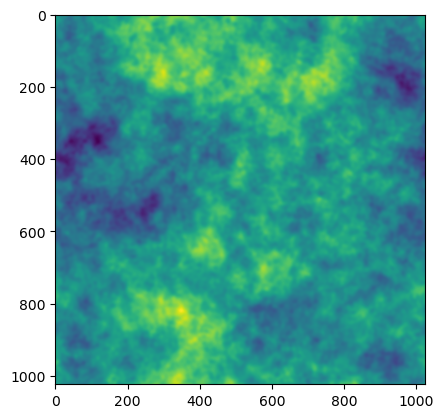

In [133]:

beam_arcmin = 1.4


kbeam2d = gauss_beam(modlmap,beam_arcmin)

beamed = filter_map(lensed,kbeam2d)


noise_uk_arcmin = 35

# Clnoise = (noise_uk_arcmin*np.pi/180./60.)**2.
# Dlnoise = Clnoise*(1+(cmb.ell/600)**-5.)

Dlnoise = noise_spectra(noise_uk_arcmin,cmb.ell.max(),600)

noise_map = cl2map(N,pix_size,ell,Dlnoise)


observed = beamed + noise_map

plt.imshow(observed)

In [129]:
ll, cl_tt_obs = map2cl(observed,50,2000,pix_size,N)

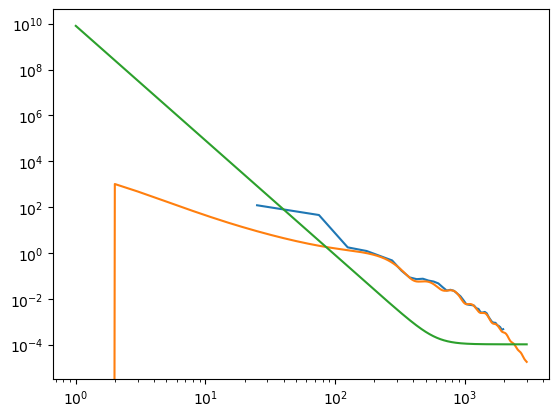

In [130]:
plt.loglog(ll,cl_tt_obs)
plt.semilogy(cmb.ell,cmb.lensed_spectra[:,0])
plt.semilogy(cmb.ell,Dlnoise)

In [36]:
noise_map = cl2map(N,pix_size,ell,Dlnoise)

In [45]:
NL = []
for i in range(10):
    noise_map = cl2map(N,pix_size,ell,Dlnoise)
    noise_cl = map2cl(noise_map,40,1000,pix_size,N)
    L, Nl = noise_cl
    NL.append(np.nan_to_num(Nl))
NL = np.array(NL)



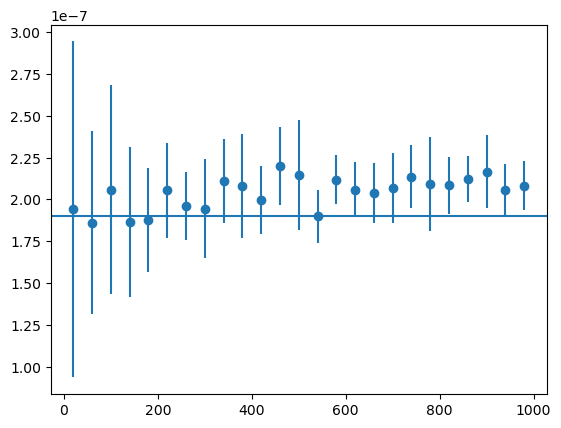

In [46]:
plt.errorbar(L,NL.mean(axis=0),yerr=NL.std(axis=0),fmt='o')
plt.axhline(np.radians(1.5/60.)**2.)

Text(0.5, 1.0, 'input')

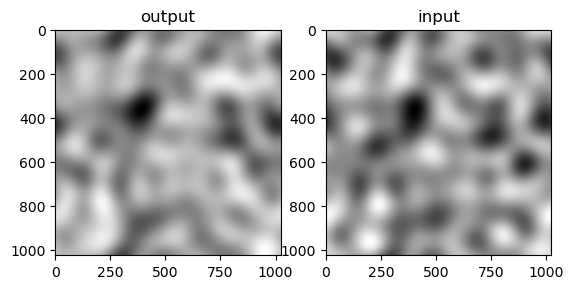

In [16]:

unlensed_cmb_power_2d = interp(ell,cmb.unlensed_spectra[:,0])(modlmap)
total_cmb_power_2d = interp(ell,cmb.lensed_spectra[:,0])(modlmap) + Clnoise/kbeam2d**2.


tmap = filter_map(observed,1/kbeam2d)

ellmin = 10
ellmax = 3000
ukappa = qe_reconstruct(tmap,unlensed_cmb_power_2d,total_cmb_power_2d,ellmin,ellmax,modlmap,ly,lx)


kellmin = 10
kellmax = 300
ukappa_f = filter_map(ukappa,kmask(modlmap*0.+1.,modlmap,kellmin,kellmax))
ikappa_f = filter_map(kappa,kmask(modlmap*0.+1.,modlmap,kellmin,kellmax))


plt.subplot(121)
plt.imshow(ukappa_f,cmap='gray')
plt.title("output")
plt.subplot(122)
plt.imshow(ikappa_f,cmap='gray')
plt.title("input")

In [124]:
corr(lensed,observed,20,300,pix_size,N,False)

/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([0.        , 0.49876673, 0.        , 0.78760501, 0.89276863,
       0.67680424, 0.83164392, 0.89735493, 0.89804223, 0.95298554,
       0.96662956, 0.98584663, 0.98077809, 0.98949536, 0.98254979])